# 위,경도 -> 기상청 좌표 변환

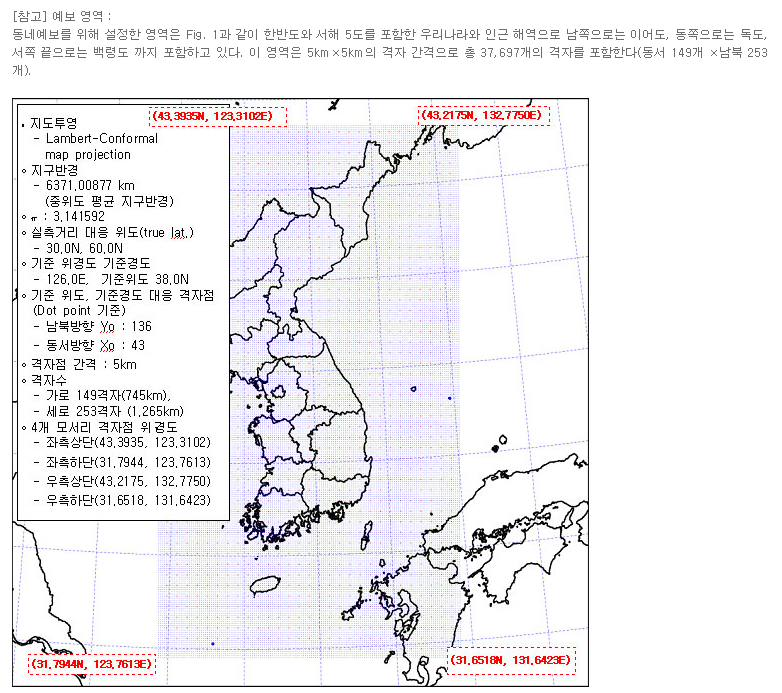

In [54]:
import math 
def grid(v1, v2): 
    RE = 6371.00877 # 지구 반경(km) 
    GRID = 5.0 # 격자 간격(km) 
    SLAT1 = 30.0 # 투영 위도1(degree) 
    SLAT2 = 60.0 # 투영 위도2(degree) 
    OLON = 126.0 # 기준점 경도(degree) 
    OLAT = 38.0 # 기준점 위도(degree) 
    XO = 43 # 기준점 X좌표(GRID) 
    YO = 136 # 기1준점 Y좌표(GRID) 
    
    DEGRAD = math.pi / 180.0 
    RADDEG = 180.0 / math.pi 
    
    re = RE / GRID
    slat1 = SLAT1 * DEGRAD 
    slat2 = SLAT2 * DEGRAD 
    olon = OLON * DEGRAD 
    olat = OLAT * DEGRAD 
    
    sn = math.tan(math.pi * 0.25 + slat2 * 0.5) / math.tan(math.pi * 0.25 + slat1 * 0.5)
    sn = math.log(math.cos(slat1) / math.cos(slat2)) / math.log(sn) 
    sf = math.tan(math.pi * 0.25 + slat1 * 0.5) 
    sf = math.pow(sf, sn) * math.cos(slat1) / sn 
    ro = math.tan(math.pi * 0.25 + olat * 0.5) 
    ro = re * sf / math.pow(ro, sn)
    rs = {}
    
    ra = math.tan(math.pi * 0.25 + (v1) * DEGRAD * 0.5) 
    ra = re * sf / math.pow(ra, sn) 
    
    theta = v2 * DEGRAD - olon 
    if theta > math.pi: 
        theta -= 2.0 * math.pi 
    if theta < -math.pi: 
        theta += 2.0 * math.pi 
    theta *= sn 
    
    rs['x'] = math.floor(ra * math.sin(theta) + XO + 0.5) 
    rs['y'] = math.floor(ro - ra * math.cos(theta) + YO + 0.5) 
    
    #string = "http://www.kma.go.kr/wid/queryDFS.jsp?gridx={0}&gridy={1}".format( str(rs["x"]).split('.')[0], str(rs["y"]).split('.')[0]) 
    #return string 
    return [rs['x'], rs['y']]

if __name__ == "__main__": 
    #print(grid(37.566826005485716, 126.9786567859313))
    pass


In [55]:
grid(37.23952, 131.86983)

[144, 123]

## aws 좌표 변환

In [2]:
import pandas as pd

In [46]:
df_aws = pd.read_csv('./aws.csv')
df_aws = df_aws.astype('float64')

In [47]:
df_aws.head()

,지점,위도,경도
0,96.0,37.23952,131.86983
1,116.0,37.44526,126.96402
2,160.0,35.11881,128.99995
3,229.0,36.62542,125.55951
4,300.0,35.85837,126.31534


In [48]:
fixed_coord = pd.DataFrame([grid(x,y) for x, y in zip(df_aws['위도'].values, df_aws['경도'].values)], columns=['fixed_la', 'fixed_lo'])

In [49]:
df_aws = pd.concat([df_aws, fixed_coord], axis=1)
df_aws.set_index('지점')

,위도,경도,fixed_la,fixed_lo
지점,,,,
96.0,37.239520,131.869830,144,123
116.0,37.445260,126.964020,60,124
160.0,35.118810,128.999950,97,74
229.0,36.625420,125.559510,35,106
300.0,35.858370,126.315340,49,89
301.0,35.085900,126.118000,45,73
302.0,34.664700,126.159200,46,63
303.0,34.072500,125.097220,27,51
304.0,34.318000,126.848500,58,56


In [51]:
df_aws.to_csv('./aws_kma.csv', index=False)